<a href="https://colab.research.google.com/github/RamoniReus/PraiaPetroleo/blob/master/ArtigoRamoniReus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O presente código é baseado na abordagem feita pelo curso gratuito “Practical Deep Learning for Coders, v3”. (https://github.com/hiromis/notes/blob/master/Lesson2.md)



In [ ]:
# Bibliotecas importantes que contém as funções necessárias
from fastai import *
from fastai.vision import *

In [ ]:
# Acesso ao google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Coleta de imagens

In [ ]:
# Cria as classes que usaremos
classes = ['praia', 'praia sargaco', 'praia petroleo']
path = Path('/content/drive/My Drive/Colab Notebooks/Artigo')
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/Artigo/praia sargaco'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Artigo/praia petroleo'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Artigo/praia')]

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

praia


praia sargaco


praia petroleo


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['praia', 'praia petroleo', 'praia sargaco']

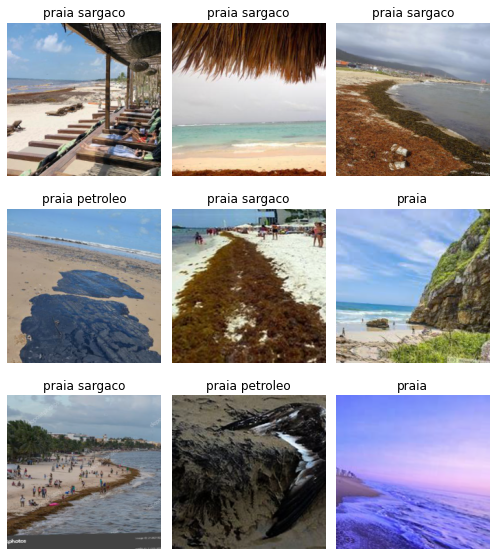

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['praia', 'praia petroleo', 'praia sargaco'], 3, 360, 90)

# Treinamento do modelo

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(13)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

# Interpretação dos resultados

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()